# AI6 Training Exercise - University Admission Prediction
## Predicción de admisión a la universidad mediante diferentes parámetros

*Autores: Mohan S Acharya, Asfia Armaan, Aneeta S Antony*

*Source: Indian Institutes of Technology*

El dataset contiene los datos relacionados con la probabilidad de admisión de diferentes estudiantes hindúes en las diferentes escuelas IIT, las más prestigiosas del país.

La predicción de probabilidad de admisión va del 0-1.

Este dataset contiene varios parámetros que se consideran importantes en el proceso de admisión a los diferentes programas de máster en IIT:
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

![Entrada principal al edificio de IIT Delhi](https://s3.ap-southeast-1.amazonaws.com/images.asianage.com/images/aa-Cover-cmrb66stiu4qb3nga8t6dmj1c1-20170504020730.Medi.jpeg)
<p style="text-align: center;"><em>Fig 1. Indian Institute of Technology in Delhi</em></p>

La principal tarea será predecir la probabilidad de admisión de nuevos aplicantes a estos programas. También será necesario obtener información esencial sobre nuestro dataset y conseguir la feature importance de los diferentes parámetros para ayudar a determinar las áreas más importantes para futuros estudiantes.

In [0]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

# Importar aquí librerias de sklearn y fastai que se consideren necesarias

import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# Crear dataframe a partir de .csv
df = pd.read_csv("/admission.csv", thousands=',')
df.dtypes

# Mostrar número de filas y columnas del dataframe
df.shape



# Mostrar las primeras 10 filas
df.head(10)

df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [0]:
#El número de serie del alumno no se considera una variable importante por lo que la eliminaremos del dataset
#df = df.drop('Serial No.', axis = 1)

#Simplificamos nombres de columnas para que sea mas fácil.
df = df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "University Rating": "URat", "LOR ": "LOR", "Chance of Admit ": "Chance"})

df.head()

,Serial No.,GRE,TOEFL,URat,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
# Hallar número de valores únicos en cada columna
for column in df.columns:
  print(column, df[column].nunique())


Serial No. 500
GRE 49
TOEFL 29
URat 5
SOP 9
LOR 9
CGPA 184
Research 2
Chance 61


In [0]:
# Comprobar la existencia de valores nulos en el dataset
df.isnull().values.sum()

0

In [0]:
# Mostrar información general del dataframe
df.dtypes

Serial No.      int64
GRE             int64
TOEFL           int64
URat            int64
SOP           float64
LOR           float64
CGPA          float64
Research        int64
Chance        float64
dtype: object

In [0]:
# Descripción analítica básica del dataframe
df.describe()

,Serial No.,GRE,TOEFL,URat,SOP,LOR,CGPA,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [0]:

from scipy import stats as stats
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.formula.api as sm

# Partir el test en cierta proporción (¡experimentar!)
y_column = ['Chance']
y = df[y_column]
x_columns = ['CGPA']
X = df[x_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Snippet para imprimir resultados, X_train es la variable que refiere
###### a la porcion de entrenamiento y X_test a la de test

print("El dataset de training tiene {} elementos.".format(X_train.shape[0]))
print("El dataset de testing tiene {} elementos.".format(X_test.shape[0]))

El dataset de training tiene 400 elementos.
El dataset de testing tiene 100 elementos.


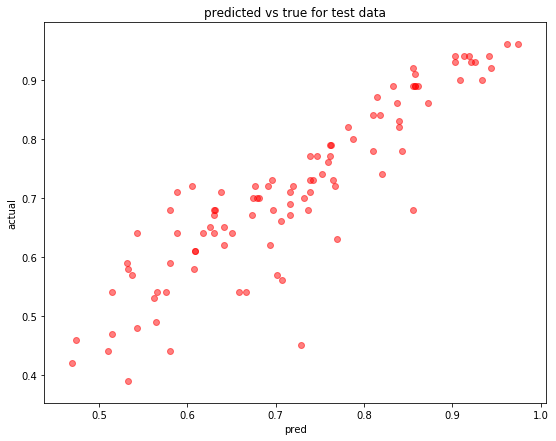

Precisión global: 0.805970774788237
MSE: 0.003967897655580556


In [0]:
# Definir un linearregressor
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Entrenar el regresor con el dataset de train


# Predecir valores para las variables independientes de test
#X_new = [[9.0]]
#print("Predicted chance", model.predict(X_new))

y_pred_test = model.predict(X_test)

plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('pred')
plt.ylabel('actual')
axes = plt.gca()
plt.show();


# Calcular la precisión
# Pista: explorar sklearn.metrics
print("Precisión global: " + str(metrics.r2_score(y_test, y_pred_test)))
print("MSE: " + str(metrics.mean_squared_error(y_test, y_pred_test)))